In [2]:
import cv2
import numpy as np
import pandas as pd
import statistics
import torch
import os
import time
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F
import torchvision.transforms as tf
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid
from PIL import Image
from collections import OrderedDict
import seaborn as sns

torch.cuda.empty_cache()


In [3]:
modelA = torch.load('MODELS/modelA_bw_resnet18_withTL.pth',map_location=torch.device('cuda:0'))
modelB = torch.load('MODELS/modelB_bw_resnet18_wTL.pth',map_location=torch.device('cuda:0'))

In [4]:
print(modelA)
print(modelB)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
#full_core = cv2.imread('../Machine Learning_GARTH/Garth_base_oriented.jpg')
#full_core = cv2.cvtColor(full_core,cv2.COLOR_BGR2RGB)

Image.MAX_IMAGE_PIXELS = None

samples = ['Garth_base_oriented']
zooms=[0.25,0.5,1,2,4,8,16]

trans = tf.Compose([tf.Resize((256,256)),
                  tf.ToTensor(),
                   ])

In [44]:
#Slice the Image


In [45]:
#Feed in the image and collect results

height: 3994 pixels,width: 39022 pixels
images in height: 3,images in width: 38
lost pixels in height: 922, lost pixels in width: 110
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
110%
120%
2.2072393894195557
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


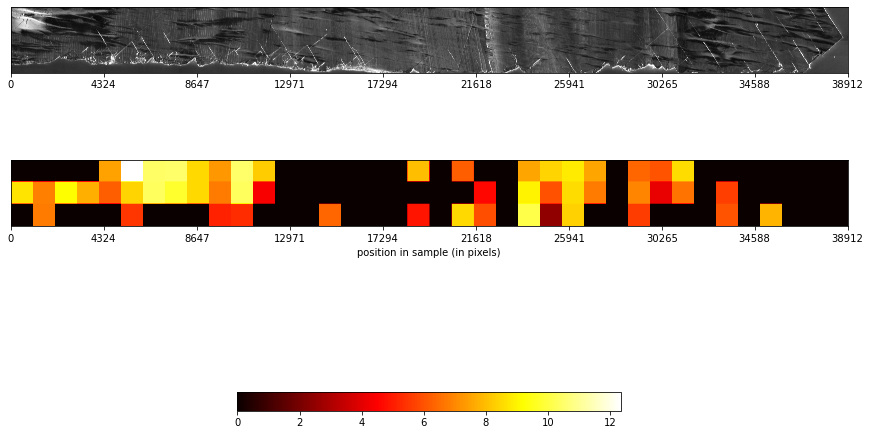

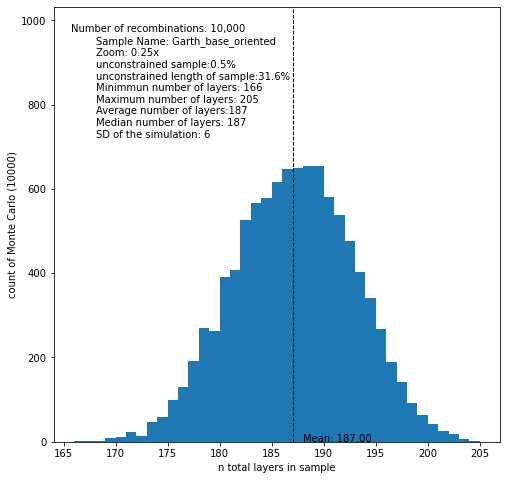

height: 3994 pixels,width: 39022 pixels
images in height: 7,images in width: 76
lost pixels in height: 410, lost pixels in width: 110
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
6.614936828613281
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


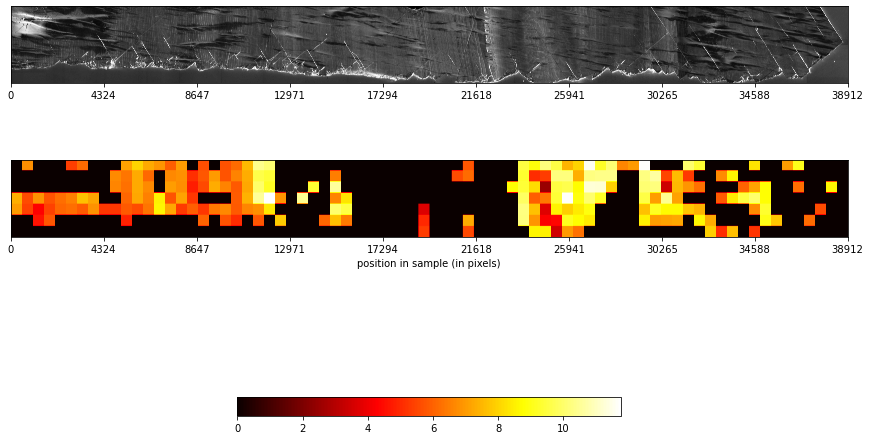

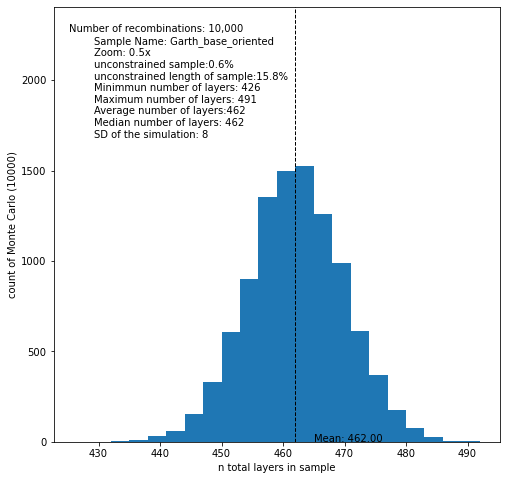

height: 3994 pixels,width: 39022 pixels
images in height: 15,images in width: 152
lost pixels in height: 154, lost pixels in width: 110
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
25.644545555114746
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


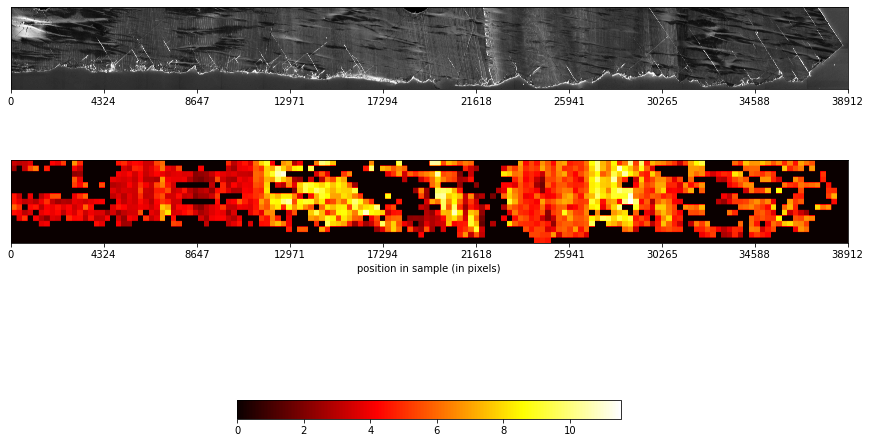

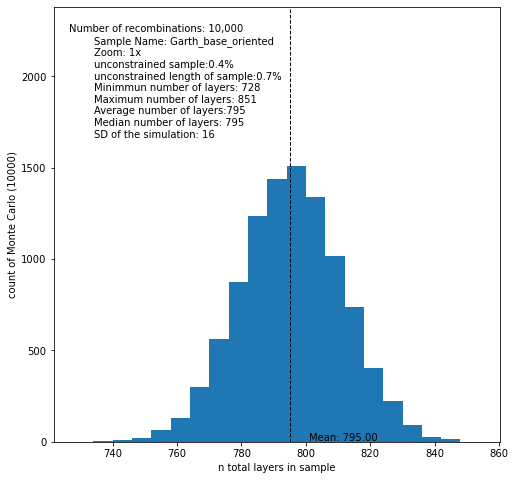

height: 3994 pixels,width: 39022 pixels
images in height: 31,images in width: 304
lost pixels in height: 26, lost pixels in width: 110
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
72.76991963386536
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


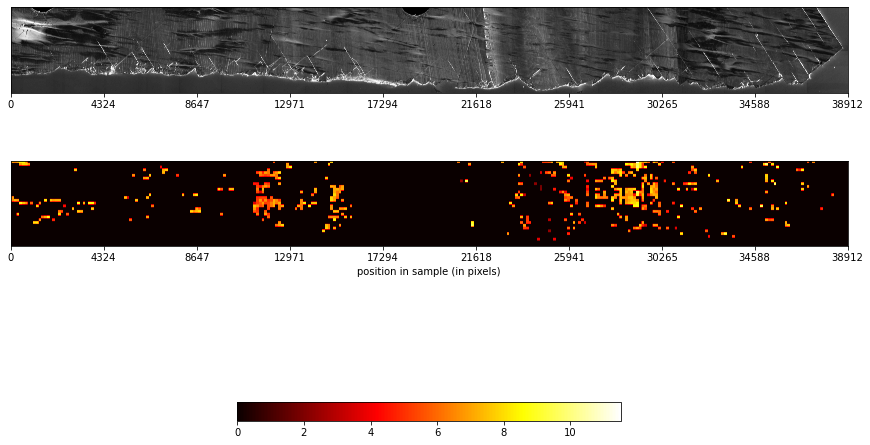

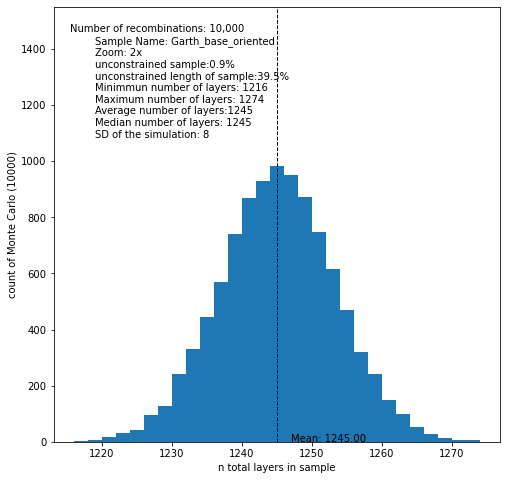

height: 3994 pixels,width: 39022 pixels
images in height: 62,images in width: 609
lost pixels in height: 26, lost pixels in width: 46
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
270.6678831577301
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


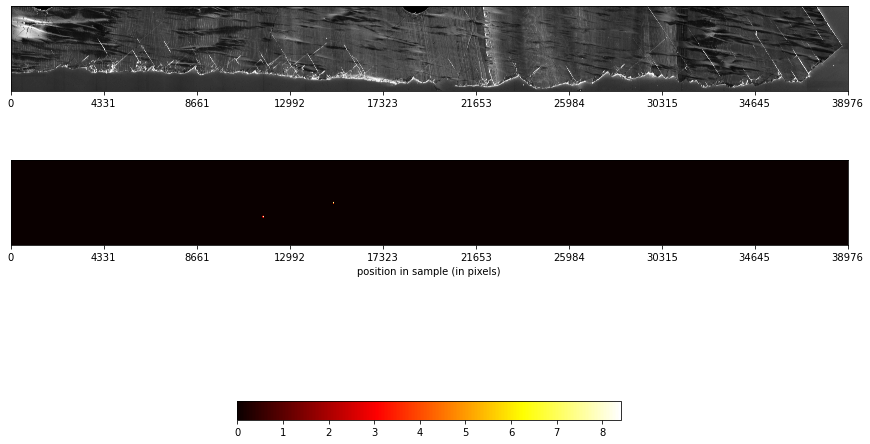

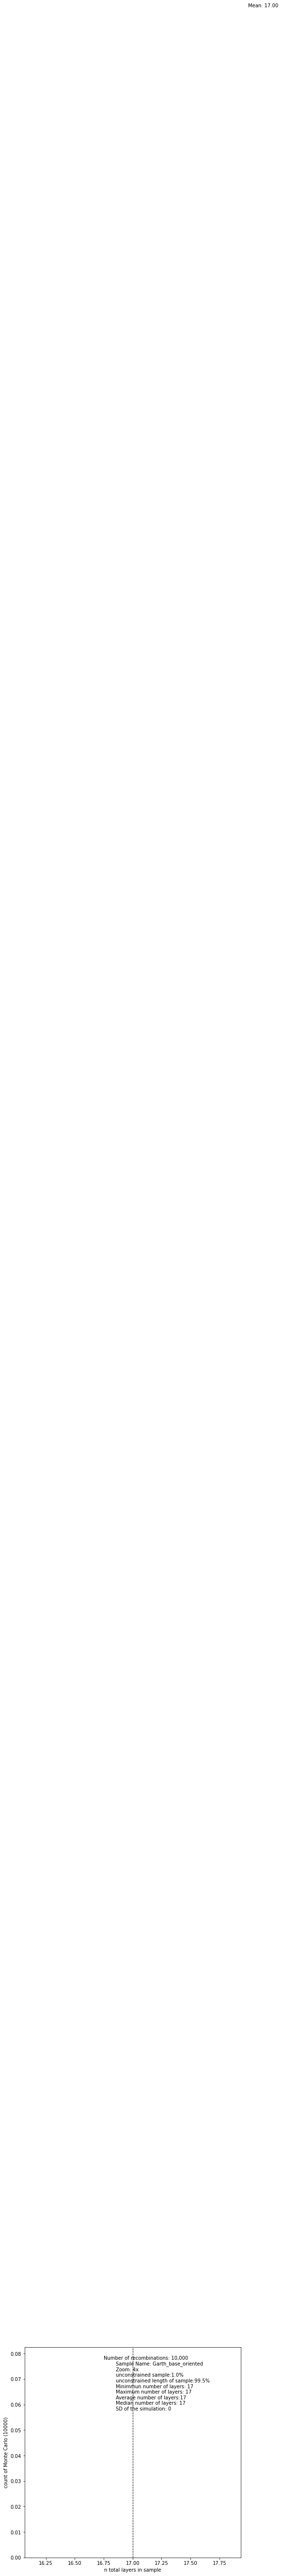

height: 3994 pixels,width: 39022 pixels
images in height: 124,images in width: 1219
lost pixels in height: 26, lost pixels in width: 14
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
1071.54176735878
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


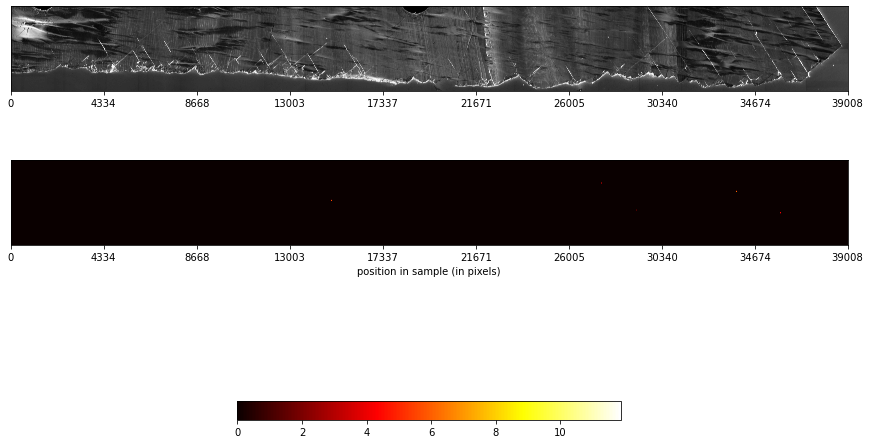

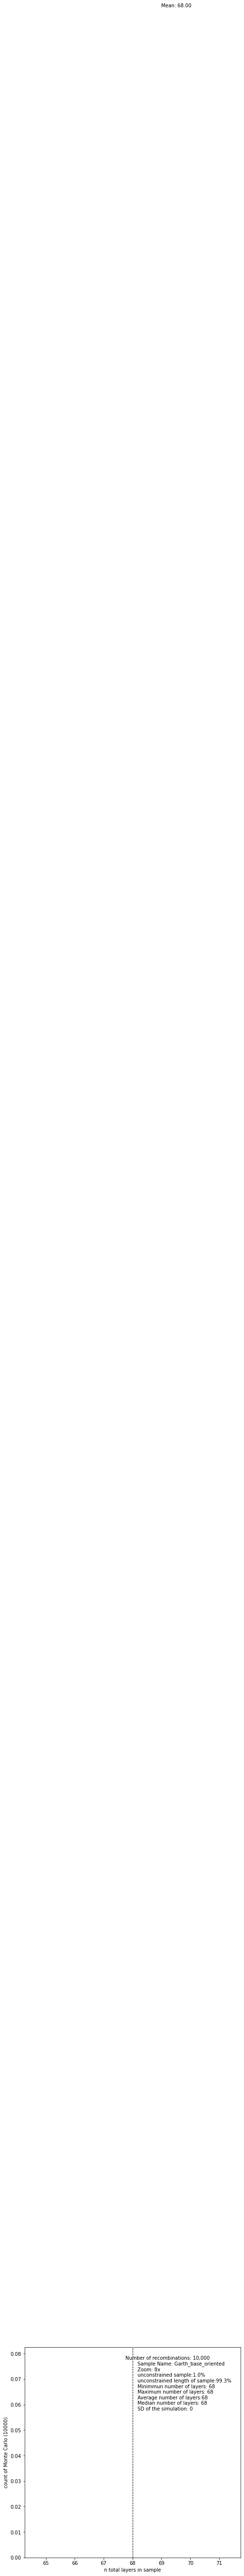

height: 3994 pixels,width: 39022 pixels
images in height: 249,images in width: 2438
lost pixels in height: 10, lost pixels in width: 14
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
4281.245136976242
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
0%


AttributeError: 'int' object has no attribute 'item'

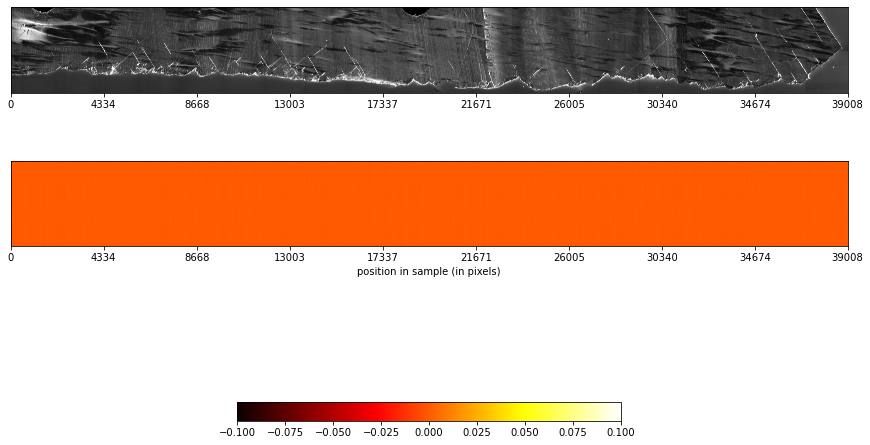

In [7]:
for sample in samples:
   
    for zoom in zooms:   
   
        full_core = Image.open(f'../Machine Learning_GARTH/201012_jpgs/{sample}.jpg')
        if len(full_core.getbands())>1:
            full_core = np.array(Image.open(f'../Machine Learning_GARTH/201012_jpgs/{sample}.jpg').getchannel('G'))
        else:
            full_core = np.array(Image.open(f'../Machine Learning_GARTH/201012_jpgs/{sample}.jpg'))


        h_in = int(256/zoom)
        w_in = h_in

        h = full_core.shape[0]
        w = full_core.shape[1]

        n_h = h//h_in
        n_w = w//w_in

        r_h = h%h_in
        r_w = w%w_in

        print(f'height: {h} pixels,width: {w} pixels')
        print(f'images in height: {n_h},images in width: {n_w}')
        print(f'lost pixels in height: {r_h}, lost pixels in width: {r_w}')



        full_core = full_core[int(r_h/2):(h-int(r_h/2)),int(r_w/2):(w-int(r_w/2))]

        quality_matrix = np.zeros((n_h,n_w), dtype = int) 
        layer_matrix = np.zeros((n_h,n_w), dtype = float)

        w_point = 0
        start_time = time.time()

        for j in range(n_w):
            if j%int(n_w/10) ==0:
                print(f'{j//int(n_w/10)*10:.0F}%')
            h_point = 0
            for i in range(n_h):        
                active_image = full_core[h_point:h_point+h_in,w_point:w_point+w_in]
                active_image = Image.fromarray(active_image)

                h_point+=h_in

                quality_matrix[i,j] =  modelA(trans(active_image).view(1,1,256,256).cuda()).argmax(dim=1).item()

                if quality_matrix[i,j]!=0:
                    layer_matrix[i,j] =  modelB(trans(active_image).view(1,1,256,256).cuda()).item()

            w_point+=w_in

        print(time.time()-start_time)

        #save model

        tosave = pd.DataFrame(layer_matrix)
        tosave.head()
        tosave.to_csv(f'{sample}_{zoom}.csv',index=False, header=True)


        #load model
        toload=pd.read_csv(f'{sample}_{zoom}.csv')
        layer_matrix1 = toload.to_numpy()
        layer_matrix= layer_matrix1

        full_core_density_bin = np.zeros((full_core.shape[0],full_core.shape[1]), dtype = float)

        for j in range(full_core_density_bin.shape[1]-1):
            for i in range(full_core_density_bin.shape[0]):
                full_core_density_bin[i,j]=layer_matrix[i//h_in,j//w_in]

            if j%int(full_core_density_bin.shape[1]/10)==0:
                print(f'{j/int(full_core_density_bin.shape[1])*100:.0F}%')

        fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1, sharex=False)

        im = ax2.imshow(full_core_density_bin,cmap='hot')
        fig.colorbar(im, ax = ax3, orientation='horizontal')

        #ax1.set_xticklabels()
        fig.set_figheight(8)
        fig.set_figwidth(15)
        ax1.imshow(full_core, cmap='gray')
        ax1.set_yticks([])
        ax2.set_yticks([])
        ax1.set_xticks(np.round(np.linspace(0,full_core.shape[1],10)))
        #ax1.set_xticklabels(np.linspace(0,24251,10,dtype=int))

        ax2.set_xticks(np.round(np.linspace(0,full_core.shape[1],10)))
        #ax2.set_xticklabels(np.linspace(0,24251,10,dtype=int))
        ax2.set_xlabel('position in sample (in pixels)')
        ax3.imshow(np.zeros([1,full_core.shape[1]]))
        ax3.set_yticks([])
        ax3.set_xticks([])
        ax3.set_xticklabels([])
        ax3.set_axis_off()

        stamp = time.strftime("%Y%m%d%H%M%S", time.gmtime())

        plt.savefig('core_layerDensity_{}_{}_{}.png'.format(sample,zoom, str(stamp)))


        carlo = []
        layer_reduced=[]
        sd=[]
        sem=[]
        avg=[]
        n=[]
        missing_len=0
        missing_tot=0

        for j in range(layer_matrix.shape[1]-1):


            popul = layer_matrix[:,j][layer_matrix[:,j]!=0]
           # try: 
            layer_reduced.append(popul)
            if popul.size == 0:
                missing_len+=1
            else:
                missing_tot+=popul.size

           # except:
           #     layer_reduced.append(100000)
           #     print(10000000000000000)

            try:
                sd.append(np.std(popul))       
            except:
                sd.append(0)
            try:
                avg.append(np.mean(popul))
            except:
                avg.append(0)


            try:    
                n.append(popul.size)
            except:
                n.append(0)

            try:
                sem.append(np.std(popul)/np.sqrt(popul.size))
            except:
                sem.append(0)





        sd.append(0)
        sem.append(0)
        avg.append(0)
        n.append(0)

        missing_len = missing_len/n_w*100
        missing_tot = 1-(missing_tot/(n_w*n_h))


        for i in range(10000):

            if i%1000 ==0:
                print(f'{i//1000*10:.0F}%')

            carlo_count = 0
            for popul in layer_reduced:
    #            popul = layer_matrix[:,j][layer_matrix[:,j]!=0]
    #            popul = layer_matrix[:,j]

                try:
                    carlo_count += np.random.choice(popul,1,replace=False)
                except:
                    pass
            carlo.append(carlo_count.item())

        minimum_carlo = round(min(carlo))
        maximum_carlo = round(max(carlo))
        avg_carlo = round(statistics.mean(carlo))
        med_carlo = round(statistics.median(carlo))
        sd_carlo=round(statistics.stdev(carlo))
        stepsize_carlo = int((maximum_carlo-minimum_carlo)/20) if int((maximum_carlo-minimum_carlo)/20)>0 else 1


        fig,(ax1) = plt.subplots(nrows=1,ncols=1, sharex=False)
        fig.set_figheight(8)
        fig.set_figwidth(8)

        ax1.hist(carlo,bins=(range(minimum_carlo,maximum_carlo+stepsize_carlo,stepsize_carlo)))
        ax1.axvline(avg_carlo, color='k', linestyle='dashed', linewidth=1)
        ax1.text(avg_carlo+stepsize_carlo, stepsize_carlo, 'Mean: {:.2f}'.format(avg_carlo))

        ax1.set_xlabel('n total layers in sample')
        ax1.set_ylabel('count of Monte Carlo (10000)')
        ylim=ax1.get_ylim()[1]*1.5
        ax1.set_ylim(0,ylim)

        ax1.text(minimum_carlo-stepsize_carlo/4,ylim*0.70,f'''Number of recombinations: 10,000
        Sample Name: {sample}
        Zoom: {zoom}x
        unconstrained sample:{missing_tot:.1F}%
        unconstrained length of sample:{missing_len:.1F}%
        Minimmun number of layers: {minimum_carlo}
        Maximum number of layers: {maximum_carlo}
        Average number of layers:{avg_carlo}
        Median number of layers: {med_carlo}
        SD of the simulation: {sd_carlo}''')




        stamp = time.strftime("%Y%m%d%H%M%S", time.gmtime())

        plt.savefig('monte_carlo_{}_{}_{}.png'.format(sample, zoom, str(stamp)))

        plt.show()



In [ ]:
minimum_carlo

In [39]:
for i in range(full_core_density_bin.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[4.23274946, 2.73866963, 2.69444084, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.99087667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.9800086 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [17]:
print(full_core.shape)
print(full_core_density_bin.shape)
print(1/(full_core_density_bin.shape[0]*full_core_density_bin.shape[1])==0)

(3328, 30977)
(3328, 30977)
False


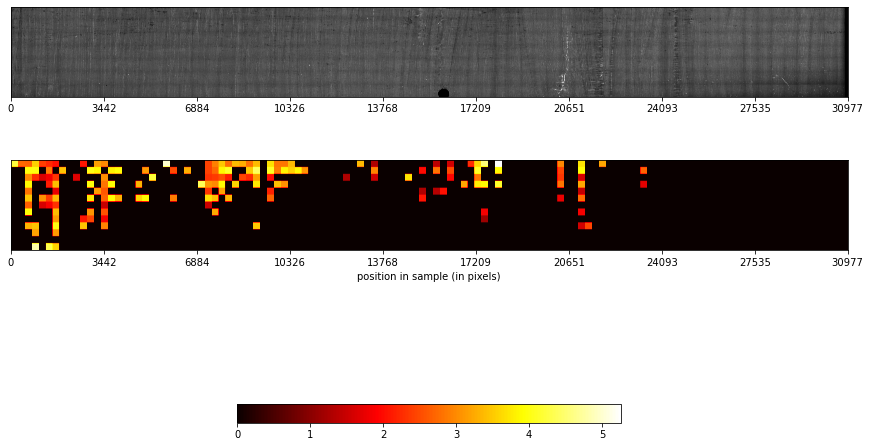

In [19]:
#Uncertainty - Monte Carlo

In [36]:
missing_len
missing_tot

0.891290527654164

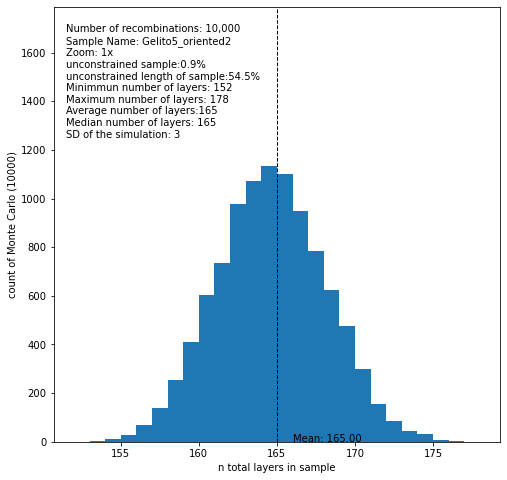

In [24]:
stepsize = 24251/152
start = np.array([i*stepsize for i in range(152)])
print(start)
stop = start + stepsize

print(stop)

[    0.           159.54605263   319.09210526   478.63815789
   638.18421053   797.73026316   957.27631579  1116.82236842
  1276.36842105  1435.91447368  1595.46052632  1755.00657895
  1914.55263158  2074.09868421  2233.64473684  2393.19078947
  2552.73684211  2712.28289474  2871.82894737  3031.375
  3190.92105263  3350.46710526  3510.01315789  3669.55921053
  3829.10526316  3988.65131579  4148.19736842  4307.74342105
  4467.28947368  4626.83552632  4786.38157895  4945.92763158
  5105.47368421  5265.01973684  5424.56578947  5584.11184211
  5743.65789474  5903.20394737  6062.75        6222.29605263
  6381.84210526  6541.38815789  6700.93421053  6860.48026316
  7020.02631579  7179.57236842  7339.11842105  7498.66447368
  7658.21052632  7817.75657895  7977.30263158  8136.84868421
  8296.39473684  8455.94078947  8615.48684211  8775.03289474
  8934.57894737  9094.125       9253.67105263  9413.21710526
  9572.76315789  9732.30921053  9891.85526316 10051.40131579
 10210.94736842 10370.4934210

In [25]:
output_file = pd.DataFrame()

In [26]:
output_file['from_um']=start
output_file['to_um']=stop

output_file['countable_imgs']=n


output_file['avg']=avg

output_file['sd']=sd

output_file['sem']=sem



ValueError: Length of values does not match length of index

In [ ]:
output_file.head()

In [ ]:
stamp = time.strftime("%Y%m%d%H%M%S", time.gmtime())
output_file.to_csv(f'data_{sample}_{stamp}.csv')
print(n_h,n_w)
full_core_density_bin = np.zeros((n_h,n_w), dtype = float)
full_core_density_bin.shape[0]


In [ ]:
#Click-Functionality

pt1 = (0,0)
pt2 = (0,0)

click1 = False
click2 = False

pt3 = (0,0)
pt4 = (0,0)

click3 = False
click4 = False

zoom_frame = cv2.resize(full_core.copy(),dsize=(int(full_core.shape[1]/40),int(full_core.shape[0]/40)))
            

def zoomer(event,x,y,flags,param):

    global pt1,pt2,click1,click2
    
    if event == cv2.EVENT_LBUTTONDOWN:

        if click1 == True and click2 == True:
            click1 = False
            click2 = False
            pt1 = (0,0)
            pt2 = (0,0)
            
        elif click1 == False:
            pt1 = (x,y)
            click1 = True
            
        elif click2 == False:
            pt2 = (x,y)
            click2 = True
            
    
    return None

def calc_layers(event,x,y,flags,param):
    
    global pt3,pt4,click3,click4
    
    if event == cv2.EVENT_LBUTTONDOWN:
    
        if click3 == True and click4 == True:
            click3 = False
            click4 = False
            pt3 = (0,0)
            pt4 = (0,0)

        elif click3 == False:
            pt3 = (x,y)
            click3 = True
            
        elif click4 == False:
            pt4 = (x,y)
            click4 = True
        
        
    
    return None


cv2.namedWindow('Core')


# Bind draw_rectangle function to mouse clicks
cv2.setMouseCallback('Core', zoomer) 

frame= cv2.resize(full_core.copy(),dsize=(int(full_core.shape[1]/40),int(full_core.shape[0]/40)))

while True:
    
    if not click1 and not click2: 
        frame= cv2.resize(full_core.copy(),dsize=(int(full_core.shape[1]/40),int(full_core.shape[0]/40)))

    
    if click1 and not click2: 
        cv2.circle(frame, center=pt1, radius=4, color=(0,0,255), thickness=-1)
    
    cv2.imshow('Core', frame)
       
    #drawing rectangle
    if click1 and click2:
        cv2.rectangle(frame, pt1, pt2, (0, 0, 255), 2)
        cv2.imshow('Core', frame)

     #   cv2.namedWindow('Zoom')
     #   cv2.setMouseCallback('Zoom', calc_layers) 

        
        top_left=(40*min(pt1[0],pt2[0]),40*min(pt1[1],pt2[1]))
        bottom_right=(40*max(pt1[0],pt2[0]),40*max(pt1[1],pt2[1]))
      #  top_right=(bottom_right[0],top_left[1])
      #  bottom_left=(bottom_right[1],top_left[0])
       
        zoom_frame= full_core.copy()[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
        zoom_layers=full_core_density_bin.copy()
        zoom_layers=zoom_layers[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]/h_in

        while True:
        
            cv2.setMouseCallback('Zoom', calc_layers) 
           
            if not click3 and not click4: 
                zoom_frame= full_core.copy()[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
                
        
            if click3 and not click4: 
                cv2.circle(zoom_frame, center=pt3, radius=4, color=(255,0,0), thickness=-1)
    
            
            if click3 and click4:
                       
                cv2.line(zoom_frame, pt3,pt4, (255, 0, 0), 1)
                cv2.arrowedLine(zoom_frame, pt4, (pt4[0],pt3[1]), (255, 0, 0), 1)
                cv2.line(zoom_frame, pt3, (pt4[0],pt3[1]), (0, 0, 255), 2)              
                cv2.namedWindow('Zoom')
                
                zoom_sum=zoom_layers[pt3[1],pt3[0]:pt4[0]].sum()
                cv2.putText(zoom_frame,str(zoom_sum),pt3,cv2.FONT_HERSHEY_PLAIN,2,(0,0,255))
 
            cv2.imshow('Zoom',zoom_frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                click1 = False
                click2 = False
                click3 = False
                click4 = False
                cv2.destroyWindow('Zoom') 
                cv2.setMouseCallback('Core', zoomer) 
                break

          
            
        
    # Display the resulting frame

    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()